In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Model

import tensorflow_datasets as tfds

tf.random.set_seed(42)

In [2]:
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLL3JR9/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLL3JR9/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLL3JR9/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
train_data, test_data = imdb['train'], imdb['test']

In [4]:
tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [5]:
len(tokenizer.subwords)

7928

In [6]:
sample_string = 'Tensorflow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
tokenized_string

[6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]

In [7]:
for token in tokenized_string:
    print("{} -> {}".format(token, tokenizer.decode([token])))

6307 -> Ten
2327 -> sor
2934 -> flow
2 -> , 
48 -> from 
4249 -> basi
4429 -> cs 
7 -> to 
2652 -> master
8050 -> y


In [8]:
original_string = tokenizer.decode(tokenized_string)
original_string

'Tensorflow, from basics to mastery'

In [9]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [13]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))


In [18]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

embedding_dim = 16
max_length = 120

model = Sequential()
model.add(Embedding(tokenizer.vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           130960    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 131,069
Trainable params: 131,069
Non-trainable params: 0
_________________________________________________________________


In [19]:
tokenizer.vocab_size


8185

In [20]:
num_epochs = 10

hist = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)


Epoch 1/10
391/391 [==============================] - 11s 24ms/step - loss: 0.6836 - accuracy: 0.5878 - val_loss: 0.6585 - val_accuracy: 0.7243
Epoch 2/10
391/391 [==============================] - 7s 17ms/step - loss: 0.5812 - accuracy: 0.7722 - val_loss: 0.5113 - val_accuracy: 0.8098
Epoch 3/10
391/391 [==============================] - 7s 17ms/step - loss: 0.4335 - accuracy: 0.8499 - val_loss: 0.4081 - val_accuracy: 0.8494
Epoch 4/10
391/391 [==============================] - 7s 17ms/step - loss: 0.3441 - accuracy: 0.8812 - val_loss: 0.3587 - val_accuracy: 0.8630
Epoch 5/10
391/391 [==============================] - 7s 17ms/step - loss: 0.2942 - accuracy: 0.8960 - val_loss: 0.3314 - val_accuracy: 0.8714
Epoch 6/10
391/391 [==============================] - 7s 17ms/step - loss: 0.2635 - accuracy: 0.9063 - val_loss: 0.3168 - val_accuracy: 0.8774
Epoch 7/10
391/391 [==============================] - 10s 25ms/step - loss: 0.2413 - accuracy: 0.9152 - val_loss: 0.3269 - val_accuracy: 0.86

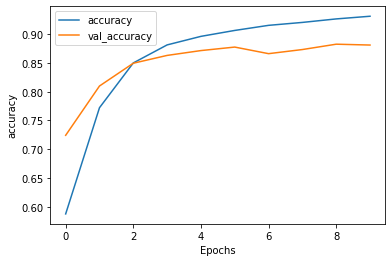

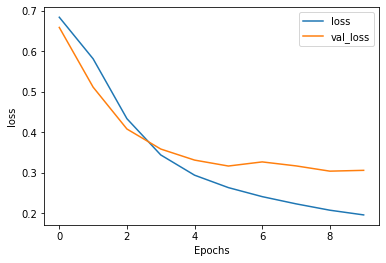

In [21]:
import matplotlib.pyplot as plt

def plot_graphs(hist, string):
    plt.plot(hist.history[string])
    plt.plot(hist.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(hist, 'accuracy')
plot_graphs(hist, 'loss')

In [30]:
embedding_dim

16

In [36]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential([
                    Embedding(tokenizer.vocab_size, embedding_dim),
                    SimpleRNN(64),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 16)          130960    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                5184      
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 138,257
Trainable params: 138,257
Non-trainable params: 0
_________________________________________________________________


In [37]:
hist = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 190s 483ms/step - loss: 0.6961 - accuracy: 0.5010 - val_loss: 0.7024 - val_accuracy: 0.5019
Epoch 2/10
391/391 [==============================] - 188s 478ms/step - loss: 0.6964 - accuracy: 0.5035 - val_loss: 0.6956 - val_accuracy: 0.4976
Epoch 3/10
391/391 [==============================] - 186s 474ms/step - loss: 0.6964 - accuracy: 0.5001 - val_loss: 0.6959 - val_accuracy: 0.5024
Epoch 4/10
391/391 [==============================] - 184s 470ms/step - loss: 0.6954 - accuracy: 0.4998 - val_loss: 0.7022 - val_accuracy: 0.5000
Epoch 5/10
391/391 [==============================] - 185s 473ms/step - loss: 0.6944 - accuracy: 0.4976 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 6/10
391/391 [==============================] - 187s 478ms/step - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5001
Epoch 7/10
391/391 [==============================] - 189s 482ms/step - loss: 0.6944 - accuracy: 0.4968 - val_loss: 0.6931 -

In [38]:
from tensorflow.keras.layers import LSTM

model = Sequential([
                    Embedding(tokenizer.vocab_size, embedding_dim),
                    LSTM(64),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 16)          130960    
                                                                 
 lstm_4 (LSTM)               (None, 64)                20736     
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 153,809
Trainable params: 153,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 479s 1s/step - loss: 0.6931 - accuracy: 0.5087 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 2/10
391/391 [==============================] - 533s 1s/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
220/391 [===============>..............] - ETA: 3:07 - loss: 0.6932 - accuracy: 0.4971

#GRU

In [ ]:
from tensorflow.keras.layers import GRU

model = Sequential([
                    Embedding(tokenizer.vocab_size, embedding_dim),
                    GRU(64),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

#Bidirctional

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([
                    Embedding(tokenizer.vocab_size, embedding_dim),
                    Bidirectional(LSTM(64)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

#Stacking

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([
                    Embedding(tokenizer.vocab_size, embedding_dim),
                    Bidirectional(LSTM(64, return_sequences=True)),
                    Bidirectional(LSTM(64)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)